**Semestrální práce z předmětu 4ST508 Neparametrické metody a analýzy přežívání**

**Téma práce: Modifikace secretary problému pro výběr z top-k kandidátů: postupný výběr se zohledněním rizika odchodu**

**Autor: Artem Vitkov**

**Datum vypracování finální verze: 12.01.2026**

# Modifikace secretary problému pro výběr z top-k kandidátů: postupný výběr se zohledněním rizika odchodu

## Nastavení parametrů
- Počet kandidátů v posloupnosti: $n = 100$.
- Horizont setrvání: $H = 12$ měsíců.
- Použitá strategie: nejdřív přeskočíme prvních $d$ kandidátů a poté vybereme prvního kandidáta, který je v daném okamžiku nejlepší (tzv. "rekord" z angl. record - záznam). Pokud se takový kandidát potom neobjeví, vybíráme posledního kandidáta z posloupnosti.
- Volba na základě článku: $k = 3$ (tj. "úspěch" pro naši studii znamená vybrat kandidáta z top-3 nejlepších).

## Cíle práce
1) **Setrvání kandidáta**: maximalizace pravděpodobnosti, že vybraný kandidát setrvá alespoň do u horizontu $H$,
   $$
   \Pr(T_{\mathrm{sel}} > H)
   $$
   kde skóre kandidáta odpovídá odhadu pravděpodobnosti přežití do $H$, tj. $\widehat S(H\mid X)$ z Coxova modelu.

2) **Společná optimalizace kvality (top-$k$) a setrvání do $H$**: maximalizace pravděpodobnosti, že vybraný kandidát zároveň setrvá do $H$
   a současně patří mezi top-$k$ kandidáty v celé posloupnosti podle uvedeného ukazatele kvality $Q$:
   $$
   \Pr\!\bigl(J^{(Q)}_{\mathrm{sel}} \le k,\; T_{\mathrm{sel}} > H\bigr)
   $$

Druhý cíl by měl popisovat praktický "tradeoff" mezi preferencí HR kandidátů s vysokou pravděpodobností setrvání do horizontu $H$ a současně snahou HR vybrat kandidáta s nadprůměrným pracovním potenciálem (top-$k$ podle ukazatele $Q$). Jinými slovy: pro HR úlohu nejde pouze o "minimalizaci odchodů", ale i o kvalitu najatého zaměstnance.

**Poznámka**: místo slovesa "přežít" budeme používat "setrvat", jelikož toto podle našeho názoru lépe odráží problematiku výběru kandidátů v HR.

## Analytická část

### Srovnávací varianta: klasický sekretářský problém (pro $k=1$)

V klasickém secretary problému (cílem je vybrat nejlepšího kandidáta, tj. $k=1$) se pro strategii "přeskočíme prvních $d$ kandidátů a poté vybereme prvního nejlepšího" ukazuje, že při velkém $n$ optimální podíl $d/n$ konverguje k $1/e$ (tzv. "pravidlo 37%"). Toto odvození používáme jako referenční bod pro porovnání s naší modifikací problému.

### Naše modifikace problému: místo pořadí používáme "setrvací skóre"

V této práci kandidáty neporovnáváme pouze podle pořadí, ale přiřazujeme jim skóre
$$
p_i = \widehat S(H\mid X_i)
$$
tj. odhad podmíněné pravděpodobnosti, že kandidát setrvá alespoň do horizontu $H$ z Coxova modelu. Stejnou strategii "přeskočíme $d$ + první rekord" pak používáme pro hodnoty $p_i$.

U cíle s optimalizací setrvání kandidáta maximalizujeme pravděpodobnost
$$
\Pr(T_{\mathrm{sel}} > H)
$$
Pokud skóre $p_i$ budeme chápat jako odhad podmíněné pravděpodobnosti setrvání kandidáta, tj. $p_i \approx \Pr(T_i>H\mid X_i)$, potom přibližně platí
$$
\Pr(T_{\mathrm{sel}} > H)
= \mathbb{E}\!\left[\Pr(T_{\mathrm{sel}} > H \mid X_{\mathrm{sel}})\right]
\approx \mathbb{E}\!\left[p_{\tau(d)}\right]
$$
kde $\tau(d)$ je index kandidáta vybraného strategií s parametrem $d$. 

Z tohoto faktu prakticky vyplývá, že nemůžeme očekávat, aby optimální podíl $d^\star/n$ byl blízký $1/e$: výsledek bude zásviset na konkrétních datech a na použitém modelu.

### Kompromis mezi top-$k$ a setrváním do $H$

U cíle se společným kompromisem mezi kvalitou (top-$k$) a setrváním do $H$ bychom požadovali, aby vybraný kandidát patřil mezi top-$k$ podle dále definovaného ukazatele "kvality" kandidáta $Q$ v rámci celé posloupnosti dostupných kandidátů. Pokud je pořadí podle $Q$ jen slabě korelované se setrváním, pak můžeme očekávat přibližný vztah
$$
P_{\text{top-}k \wedge \text{setrvání}}(d)\ \approx\ \frac{k}{n}\,P_{\text{setrvání}}(d)
$$
kde $P_{\text{setrvání}}(d)=\Pr(T_{\mathrm{sel}} > H)$ je úspěšnost pro cíl "pouze setrvání". Pro $k=3$ a $n=100$ to znamená úspěšnost v řádu jednotek procent i v případě, že $P_{\text{setrvání}}(d)$ bude vycházet relativně vysoko.

## Předpoklady

1. **Náhodné pořadí při pohovorech kandidátů**  
   Kandidáti přicházejí na pohovory rovnoměrně a v náhodném pořadí, které je nezávislé na jejich kvalitě i na riziku odchodu ze studie.

2. **Nevratné rozhodnutí**  
   Jakmile kandidáta odmítneme, nemůžeme se k němu později vrátit.

3. **Skóre je v čase rozhodnutí porovnatelné napříč kandidáty**  
   V okamžiku vyhodnocení kandidáta dokážeme spočítat jeho skóre a porovnat ho s dosud pozorovanými kandidáty, tzn. víme, zda je aktuálně nejlepší z odbavených nebo ne.

4. **Přežití vyjadřuje pravděpodobnost setrvání do $H$**  
   Pro kandidáta s vysvětlujícími proměnnými $X$ uvažujeme
   $$
   p(H\mid X)=\Pr(T>H\mid X)=S(H\mid X)
   $$
   kde $T$ je čas do odchodu a $S(\cdot\mid X)$ je funkce přežití. **V datech předpokladáme pravostranné cenzorování.**

5. **Předpověď přežití používáme jako skóre**  
   Odhad $\widehat p(H\mid X)=\widehat S(H\mid X)$ z Coxova modelu budeme používat jako skóre v postupném výběru kandidátů. Při srovnání s "rankovacím" přístupem budeme pracovat s kvantily hodnot $\widehat p(H\mid X)$ (používáme binning pro tyto hodnoty).


## Definice pojmů

V jedné posloupnosti postupně procházíme $n$ kandidátů ($n=100$).

### Notace pro analýzu přežití

Pro kandidáta $i$ označme:

- $T_i$ - doba do události (doba setrvání); proměnná `T_months`
- $\delta_i\in\{0,1\}$ - indikátor události (odchodu); proměnná `E`
- $X_i$ - vektor vysvětlujících proměnných

Fixujeme horizont $H=12$ měsíců a definujeme indikátor setrvání do $H$:
$$
\mathrm{survive}_i = \mathbf{1}\{T_i \ge H\}
$$

### Vyřazení při pravostranném cenzorování a diskuze alternativy

Pro vyhodnocení cíle "setrvání do $H$" potřebujeme u každého kandidáta jednoznačně určit indikátor $\mathbf{1}\{T \ge H\}$.  
Pokud je ale pozorování pravostranně cenzorované před $H$ (tj. $\delta=0$ a $T<H$), tak o něm rozhodnout nemůžeme: máme jen informaci, že kandidát setrval alespoň do času $T$, ale nevíme, jestli by vydržel až do $H$.

Na "testu" proto tyto případy nehodnotíme a metriky počítáme jen na podmnožině, kde je status do $H$ jasný (tzn. buď $T \ge H$, nebo $\delta=1$ a $T<H$). Bereme to jako praktické zjednodušení. Předpokládáme, že cenzorování před $H$ je cca neinformativní (příp. podmíněně na $X$). Jako kontrolu proto uvádíme dále v textu i podíl vyřazených pozorování (cenzorovaných před $H$).

Poznámka: Alternativou by bylo vážené vyhodnocení pomocí IPCW, které explicitně zohledňuje i pravostranné cenzorování před $H$. My ale kvůli jednoduchosti prvádíme vyhodnocení jen na případech, kde je status do $H$ jednoznačný. Dále ukážeme, že tato volba je opravdu opodstatněna, a není v rozporu s cílem práce.

### Skóre pro postupný výběr

Na trénovací části odhadneme Coxův model a pro kandidáta $i$ odhadneme pravděpodobnost setrvání do $H$:
$$
\widehat p_i = \widehat S(H\mid X_i)
$$
Hodnota $\widehat p_i$ je **skóre**, které používáme ve strategii "přeskočíme $d$ kandidátů a poté vybereme prvního nejlepšího".

### Dvě cílové funkce

V práci porovnáváme dvě definice úspěchu:

1) **Pouze setrvání:** vybraný kandidát setrvá do $H$:
$$
\text{success}_{\mathrm{surv}} = \{T_{\mathrm{sel}} \ge H\}
$$

2) **Top-$k$ podle kvality a setrvání do $H$:** kromě setrvání do $H$ požadujeme, aby vybraný kandidát patřil mezi top-$k$ podle ukazatele kvality $Q$ v rámci celé posloupnosti.

Protože dataset neobsahuje přímou metriku výkonu, budeme používat definovaný námi ukazatel kvality $Q_i$ (`Potential Index`).

Nechť $J^{(Q)}_{\mathrm{sel}}$ je pořadí vybraného kandidáta v rámci posloupnosti podle $Q$ (1 = nejlepší), pak:
$$
\text{success}_{\mathrm{topk}}
= \{J^{(Q)}_{\mathrm{sel}}\le k\}\cap\{T_{\mathrm{sel}}\ge H\}
$$

**Interpretace:** výběr probíhá postupně podle skóre setrvání kandidáta $\widehat p_i$. Podmínku "top-$k$" vyhodnocujeme podle ukazatele kvality $Q$, psychologicky řečeno hledáme kompromis mezi stabilitou kandidáta a jeho potenciálem na pracovním místě.


## Data a "survival" proměnné

Pracujeme s datasetem **Employee Turnover** (autor: Edward Babushkin). Pro analýzu přežití z něj používáme:

- čas do události: `stag` (doba setrvání / zkušenost) převedený na `T_months`
- indikátor události: `event` (1 = odchod), v notebooku `E`
- vysvětlující proměnné: `gender`, `age`, `industry`, `profession`, `traffic`, `coach`, `head_gender`, `greywage`, `way`
  a psychometrie (Big5): `extraversion`, `independ`, `selfcontrol`, `anxiety`, `novator`

### Jednotky času

Proměnná `stag` může být v různých verzích datasetu v **letech** nebo v **měsících**. V kódu proto používáme jednoduchou heuristiku:
pokud `stag.max() \le 40`, bereme `stag` jako roky a převádíme na měsíce; jinak `stag` bereme přímo jako měsíce.  
Horizont setrvání fixujeme na $H=12$ měsíců.

Po těchto úpravách pro máme vstupní data pro analýzu přežití:

- $T_i$ : doba do události v měsících (`T_months`, z `stag`)
- $\delta_i$ : indikátor události (`E`, z `event`)

### Jednoznačné vyhodnocení setrvání do $H$

Pro Monte Carlo simulaci potřebujeme binární indikátor o tom, jestli kandidát setrval do $H$.  
Kandidáty s pravostranným cenzorováním před $H$ (tj. $E=0$ a $T_i<H$) neumíme jednoznačně zařadit jako "ano/ne", a proto je v testovacím vyhodnocení vyřazujeme, jak jsme popsali v sekci **Definice pojmů**.

## Import knihoven

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split

from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.utils import concordance_index
from lifelines.exceptions import ConvergenceError
from lifelines.statistics import logrank_test
from lifelines.statistics import proportional_hazard_test
from scipy.stats import mannwhitneyu

warnings.filterwarnings("ignore")

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

## Parametry experimentu a načtení dat

Fixujeme horizont na $H=12$ měsíců a pracujeme s počtem kandidátů $n=100$.  

Níže načítáme CSV na základě různých verzí datasetu přímo z Kaggle, protože se mohou lišit verze vstupního souboru i jeho kódování.

In [30]:
H = 12      # horizont v měsících
n = 100     # počet kandidátů v posloupnosti
k_top = 3   # top-k pro cíl "top-k a délší setrvání" 

def read_csv_robust(path: str) -> pd.DataFrame:
    encodings = ["utf-8", "utf-8-sig", "cp1250", "cp1251", "cp1252", "latin1", "iso-8859-1"]
    for enc in encodings:
        try:
            return pd.read_csv(path, sep=None, engine="python", encoding=enc)
        except Exception:
            pass
    return pd.read_csv(path, sep=None, engine="python", encoding="latin1", encoding_errors="replace")

# Varianta 1: KaggleHub 
csv_path = None
try:
    import kagglehub  
    import os
    base_dir = kagglehub.dataset_download("davinwijaya/employee-turnover")
    candidate = os.path.join(base_dir, "turnover.csv")
    if os.path.exists(candidate):
        csv_path = candidate
except Exception:
    csv_path = None

# Varianta 2: lokálně
if csv_path is None:
    csv_path = r"C:\Users\vitko\.cache\kagglehub\datasets\davinwijaya\employee-turnover\versions\1\turnover.csv"

df = read_csv_robust(csv_path)
print("Loaded:", df.shape, "from", csv_path)
df.head()
# -----------------------------

Loaded: (1129, 16) from C:\Users\vitko\.cache\kagglehub\datasets\davinwijaya\employee-turnover\versions\1\turnover.csv


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


## Konstrukce proměnných pro analýzu přežití

Vytvoříme dvě hlavní proměnné:

- `T_months`: doba do události v měsících
- `E`: indikátor události (1 = odchod, 0 = cenzorování)


In [31]:
expected = {
    "stag","event","gender","age","industry","profession","traffic","coach","head_gender",
    "greywage","way","extraversion","independ","selfcontrol","anxiety","novator"
}
missing = expected - set(df.columns)
if missing:
    print("WARNING: Missing expected columns:", sorted(missing))

stag = pd.to_numeric(df["stag"], errors="coerce")
if stag.notna().sum() == 0:
    raise ValueError("Sloupec 'stag' neobsahuje žádné číselné hodnoty po převodu.")

stag_max = float(stag.max())

stag_is_years = (stag_max <= 40)
df["T_months"] = (12.0 * stag) if stag_is_years else stag

E = pd.to_numeric(df["event"], errors="coerce")
df["E"] = (E == 1).astype(int)  

df = df.dropna(subset=["T_months","E"]).copy()
df = df[df["T_months"] > 0].copy()
df["E"] = df["E"].astype(int)

print(f"stag max={stag_max:.2f} → interpretace: {'roky' if stag_is_years else 'měsíce'}; T_months je v měsících")
print("N =", len(df), " event rate =", round(df["E"].mean(), 3))
print(df[["T_months","E"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))


stag max=179.45 → interpretace: měsíce; T_months je v měsících
N = 1129  event rate = 0.506
          T_months            E
count  1129.000000  1129.000000
mean     36.627526     0.505757
std      34.096597     0.500188
min       0.394251     0.000000
10%       4.960986     0.000000
25%      11.728953     0.000000
50%      24.344969     1.000000
75%      51.318275     1.000000
90%      86.143737     1.000000
max     179.449692     1.000000


### Proxy kvality $Q$ (Potential Index)

Dataset neobsahuje přímou metriku pracovního výkonu, proto pro druhý cíl zavedeme **ukazatel kvality** $Q_i$.

$Q_i$ skládáme jako LK standardizovaných Big5 skóre a dvou dalších proměnných:

- s "+": `independ`, `novator`, `selfcontrol`, `extraversion` (+0.5, v závislosti na kontextu může mít různé dopady)
- s "-": `anxiety`, (může být problém s adaptací v kolektivu)
- korekce: `coach` (podpora na začátku může pomoct nováčku) a `greywage` (dopad na produktivitu práce)

Z-score standardizaci počítáme **pouze na trénovací části**, abychom se vyhnuli úniku informace z testu do konstrukce indexu ("data leakage"). 

Koeficienty volíme přibližně tak, aby žádná složka nedomninovala a aby potom ten index šel rozumně interpretovat.


In [32]:
def to_binary01(s: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(s):
        return (pd.to_numeric(s, errors="coerce") == 1).astype(int)
    x = s.astype(str).str.lower().str.strip()
    return x.isin(["1","yes","y","true","t"]).astype(int)

work = df.copy()
work["coach01"] = to_binary01(work["coach"]) if "coach" in work.columns else 0
work["greywage01"] = to_binary01(work["greywage"]) if "greywage" in work.columns else 0

num_cols = ["age","extraversion","independ","selfcontrol","anxiety","novator","coach01","greywage01"]
for c in ["age","extraversion","independ","selfcontrol","anxiety","novator"]:
    if c in work.columns:
        work[c] = pd.to_numeric(work[c], errors="coerce")

cat_cols = ["gender","industry","profession","traffic","head_gender","way"]
cat_cols = [c for c in cat_cols if c in work.columns]

need_cols = ["T_months","E"] + [c for c in num_cols if c in work.columns] + cat_cols
base = work[need_cols].dropna().copy()
base = base[base["T_months"] > 0].copy()

train_raw, test_raw = train_test_split(base, test_size=0.30, random_state=RANDOM_STATE)

big5 = ["extraversion","independ","selfcontrol","anxiety","novator"]
big5 = [c for c in big5 if c in train_raw.columns]

mu_q = train_raw[big5].mean()
sd_q = train_raw[big5].std().replace(0, 1.0)

z_tr = (train_raw[big5] - mu_q) / sd_q
z_te = (test_raw[big5] - mu_q) / sd_q

alpha_coach = 0.3
alpha_grey = 0.3

train_raw["quality_score"] = (
    z_tr.get("independ",0) + z_tr.get("novator",0) + z_tr.get("selfcontrol",0)
    + 0.5 * z_tr.get("extraversion",0)
    - 1.0 * z_tr.get("anxiety",0)
    + alpha_coach * train_raw.get("coach01",0).astype(float)
    - alpha_grey * train_raw.get("greywage01",0).astype(float)
)
test_raw["quality_score"] = (
    z_te.get("independ",0) + z_te.get("novator",0) + z_te.get("selfcontrol",0)
    + 0.5 * z_te.get("extraversion",0)
    - 1.0 * z_te.get("anxiety",0)
    + alpha_coach * test_raw.get("coach01",0).astype(float)
    - alpha_grey * test_raw.get("greywage01",0).astype(float)
)

print("Base:", base.shape, "Train:", train_raw.shape, "Test:", test_raw.shape)

test_raw[["quality_score"]].head()


Base: (1129, 16) Train: (790, 17) Test: (339, 17)


,quality_score
680,-1.299038
1050,-0.685793
83,3.049816
148,0.677681
921,2.743299


Po vyčištění dat a vytvoření nových proměnných máme celkem $N=1129$ pozorování. 

Po rozdělení původního datasetu 70/30 pracujeme s trénovací částí $n_{\text{train}}=790$ a testovací částí $n_{\text{test}}=339$.

U ukazatele `quality_score` vyšší hodnota pak znamená vyšší odhadovaný potenciál.


## Feature engineering pro Coxův model

Coxův model může být citlivý na kolinearitu a na "separaci" (hlavně po one-hot encodingu kategorií). Aby odhad vůbec doběhl, uděláme několik jednoduchých transformací:

- vzácné kategorie sloučíme do `Other`
- numerické proměnné standardizujeme
- téměř konstantní sloupce vyhodíme


In [33]:

MIN_COUNT = 30  
for col in cat_cols:
    vc = train_raw[col].astype(str).value_counts(dropna=False)
    keep = set(vc[vc >= MIN_COUNT].index)
    train_raw[col] = train_raw[col].astype(str).where(train_raw[col].astype(str).isin(keep), "Other")
    test_raw[col]  = test_raw[col].astype(str).where(test_raw[col].astype(str).isin(keep), "Other")

num_scale = [c for c in ["age","extraversion","independ","selfcontrol","anxiety","novator"] if c in train_raw.columns]
mu = train_raw[num_scale].mean()
sd = train_raw[num_scale].std().replace(0, 1.0)
train_raw[num_scale] = (train_raw[num_scale] - mu) / sd
test_raw[num_scale]  = (test_raw[num_scale]  - mu) / sd

train_enc = pd.get_dummies(train_raw, columns=cat_cols, drop_first=True, dtype=np.float64)
test_enc  = pd.get_dummies(test_raw,  columns=cat_cols, drop_first=True, dtype=np.float64)

test_enc = test_enc.reindex(columns=train_enc.columns, fill_value=0.0)

for _df in (train_enc, test_enc):
    if "quality_score" in _df.columns:
        _df.drop(columns=["quality_score"], inplace=True)

if "quality_score" in train_enc.columns:
    train_enc = train_enc.drop(columns=["quality_score"])
if "quality_score" in test_enc.columns:
    test_enc = test_enc.drop(columns=["quality_score"])

X_tmp = train_enc.drop(columns=["T_months", "E"])
non_num = X_tmp.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns in train_enc:", non_num[:50], "..." if len(non_num) > 50 else "")
print("Count non-numeric:", len(non_num))

non_num = train_enc.drop(columns=["T_months", "E"]).select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric covariates after encoding:", len(non_num))

feature_cols = [c for c in train_enc.columns if c not in ["T_months","E"]]
var = train_enc[feature_cols].var()
keep_cols = var[var > 1e-10].index.tolist()

train_df = train_enc[["T_months","E"] + keep_cols].copy()
test_df  = test_enc[["T_months","E"] + keep_cols].copy()

X_train_df = train_df.drop(columns=["T_months","E"])
X_train = X_train_df.to_numpy(dtype=float)

if not np.isfinite(X_train).all():
    bad = np.where(~np.isfinite(X_train))
    bad_cols = X_train_df.columns[np.unique(bad[1])].tolist()
    raise ValueError(f"Found non-finite values. Bad columns (subset): {bad_cols[:20]}")

print("Train shape:", train_df.shape, "| Test shape:", test_df.shape)
print("Num features kept:", len(keep_cols))
print("Train event rate:", round(train_df["E"].mean(), 3))

non_num = train_df.drop(columns=["T_months","E"]).select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric covariates:", "None" if len(non_num) == 0 else non_num[:20])

Non-numeric columns in train_enc: [] 
Count non-numeric: 0
Non-numeric covariates after encoding: 0
Train shape: (790, 31) | Test shape: (339, 31)
Num features kept: 29
Train event rate: 0.506
Non-numeric covariates: None


Po one-hot encodingu a základní filtraci dostáváme 29 vysvětlujících proměnných (plus `T_months` a `E`). 

V datech už pak nemáme žádné kategoriální proměnné a podíl událostí (odchodů) v trénovací části vychází cca 0.51.

### Coxův model a skóre setrvání kandidáta

Riziko odchodu modelujeme Coxovým modelem proporčního rizika:
$$
\lambda(t\mid X)=\lambda_0(t)\exp(\beta^\top X)
$$
Z odhadnutého modelu pak získáme funkci přežití a jako skóre kandidáta použijeme
$$
\widehat p_i=\widehat S(H\mid X_i)
$$
tedy odhad pravděpodobnosti, že kandidát setrvá alespoň do horizontu $H$ měsíců.

In [34]:

X_test  = test_df.drop(columns=["T_months","E"])

fit_attempts = [
    dict(penalizer=0.1, l1_ratio=0.0),
    dict(penalizer=0.5, l1_ratio=0.0),
    dict(penalizer=1.0, l1_ratio=0.0),
    dict(penalizer=0.1, l1_ratio=0.5),
]

cph = None
chosen = None

for params in fit_attempts:
    try:
        cph = CoxPHFitter(**params)
        cph.fit(train_df, duration_col="T_months", event_col="E")
        chosen = params
        print("Vybraná penalizace:", params)
        break
    except ConvergenceError:
        print("Fitování modelu neproběhlo:", params)
        cph = None

if cph is None:
    raise RuntimeError("Cox model failed for all penalizer settings.")


S_H = cph.predict_survival_function(X_test, times=[float(H)])  # index = [H], columns = osoby
p_hat = S_H.iloc[0].values  # délka = počet osob

test_pred = test_df[["T_months","E"]].copy()
test_pred["p_hat_H"] = p_hat

partial_haz = cph.predict_partial_hazard(X_test).values.ravel()
c_index = concordance_index(test_df["T_months"].values, -partial_haz, test_df["E"].values)

print("C-index:", c_index)

print("p_hat_H:", float(((test_pred["p_hat_H"]>=0) & (test_pred["p_hat_H"]<=1)).mean()))
test_pred.head()

Vybraná penalizace: {'penalizer': 0.1, 'l1_ratio': 0.0}
C-index: 0.6285189305822461
p_hat_H: 1.0


,T_months,E,p_hat_H
680,27.466119,0,0.828737
1050,19.055441,0,0.904420
83,7.950719,1,0.824021
148,142.455852,1,0.932702
921,16.065708,0,0.721137


### Krátká interpretace koeficientů v modelu Coxe

V Coxovým modelu platí, že kladný koeficient ($\beta>0$) zvyšuje riziko odchodu (tedy snižuje pravděpodobnost setrvání) a záporný koeficient ($\beta<0$) riziko naopak snižuje.

Interpretace je podobná jako u logitového modelu. Poměr rizik (hazard ratio) je $\exp(\beta)$ a říká, kolikrát se změní riziko odchodu při zvýšení daného prediktoru o jednotku. 

Po one-hot kódování vzniká hodně prediktorů a některé kategorie jsou vzácné, což může způsobit, že odhad modelu špatně konverguje (problém multikolinearity). Pro tento účel používáme L2-regulrizaci s nastavením `penalizer = 0.1` (`l1_ratio = 0.0`). Naším cílem tady není pokoušet se o kauzální interpretaci koeficientů, ale stabilně získat predikce $\widehat S(H\mid X)$ pro následnou simulaci postupného výběru kandidátů.


In [35]:
cph.summary.head(10)

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.157987,1.171151,0.049578,0.060815,0.255159,1.062702,1.290667,0.0,3.186600,0.001440,9.440159
extraversion,0.064172,1.066276,0.058184,-0.049866,0.178210,0.951357,1.195076,0.0,1.102921,0.270061,1.888640
independ,-0.003030,0.996975,0.054090,-0.109045,0.102985,0.896690,1.108475,0.0,-0.056011,0.955333,0.065924
selfcontrol,-0.063938,0.938063,0.061731,-0.184928,0.057052,0.831164,1.058711,0.0,-1.035758,0.300315,1.735452
anxiety,-0.024209,0.976082,0.054151,-0.130344,0.081926,0.877794,1.085376,0.0,-0.447055,0.654835,0.610796
novator,-0.005235,0.994779,0.055686,-0.114377,0.103908,0.891922,1.109498,0.0,-0.094001,0.925108,0.112306
coach01,0.148697,1.160322,0.146377,-0.138196,0.435591,0.870928,1.545876,0.0,1.015853,0.309699,1.691059
gender_m,-0.064284,0.937739,0.126879,-0.312961,0.184394,0.731278,1.202489,0.0,-0.506655,0.612397,0.707461
industry_Building,0.127266,1.135719,0.232996,-0.329398,0.583930,0.719356,1.793072,0.0,0.546214,0.584919,0.773692


### Výsledky odhadu Coxova modelu

Model s ridge penalizací (`penalizer = 0.1`) nám úspěšně dokonvergoval. Na testovací množině vychází $C \approx 0.63$, takže model umí zaměstnance aspoň rozumně seřadit podle rizika odchodu (není to perfektní, ale jako skórovací model to dává smysl).

Například, proměnná `age` má kladný koeficient ($\beta \approx 0.158$), takže vyšší věk (pro z-score o 1 směrodatnou odchylku) je v našem modelu spojen s vyšším rizikem odchodu. Odpovídající poměr rizik je $\exp(\beta)\approx 1.17$.

Pozn.: Definovaný ukazatel kvality `quality_score` do fitu Coxovy regrese nezahrnujeme, protože ho potom budeme používat pro postupný scoring kandidátů.

## Jednoznačné vyhodnocení setrvání do $H$

Pozorování s pravostranným cenzorováním před $H$ (tj. `E=0` a `T_months < H`) jsou pro binární vyhodnocení "setrval / nesetrval do času $H$" nejednoznačná, proto je v rámci experimentu vyřadíme.

In [36]:
cond_survive = test_pred["T_months"] >= H
cond_fail    = (test_pred["E"] == 1) & (test_pred["T_months"] < H)
cond_ambig   = (test_pred["E"] == 0) & (test_pred["T_months"] < H)

usable = test_pred.loc[cond_survive | cond_fail].copy()
usable["survive_H"] = (usable["T_months"] >= H).astype(int)

missing_idx = usable.index.difference(test_raw.index)
if len(missing_idx) > 0:
    raise ValueError(f"Index mismatch: {len(missing_idx)} rows in usable not found in test_raw.")

usable["quality_score"] = test_raw.loc[usable.index, "quality_score"].astype(float)

usable = usable.dropna(subset=["p_hat_H","quality_score","T_months","E"]).copy()

rho = usable[["p_hat_H","quality_score"]].corr(method="spearman").iloc[0, 1]
print("Spearmanova korelace (p_hat_H, quality_score):", float(rho))

n_test   = len(test_pred)
n_ambig  = int(cond_ambig.sum())
n_usable = len(usable)

print(f"Rozsah souboru pro test celkem: {n_test}")
print(f"Nejednoznačná pozorování (E=0 & T<H): {n_ambig}  ({n_ambig/n_test:.1%})")
print(f"Použitelná (survive nebo fail): {n_usable}  ({n_usable/n_test:.1%})")

usable[["T_months","E","p_hat_H","survive_H","quality_score"]].head()

Spearmanova korelace (p_hat_H, quality_score): -0.12777804668158235
Rozsah souboru pro test celkem: 339
Nejednoznačná pozorování (E=0 & T<H): 45  (13.3%)
Použitelná (survive nebo fail): 294  (86.7%)


,T_months,E,p_hat_H,survive_H,quality_score
680,27.466119,0,0.828737,1,-1.299038
1050,19.055441,0,0.904420,1,-0.685793
83,7.950719,1,0.824021,0,3.049816
148,142.455852,1,0.932702,1,0.677681
921,16.065708,0,0.721137,1,2.743299


### Kontrola dopadu vyřazení pravostranně cenzorovaných pozorování

Vyřazené případy typu `E=0` a `T_months < H` mají z definice krátké pozorování (medián cca 6.3 měsíce). Klíčové ale je, jestli tím systematicky neměníme rozdělení skóre setrvání $\widehat p=\widehat S(H\mid X)$. Proto porovnáváme hodnoty `p_hat_H` mezi použitými a vyřazenými pozorováními. 

In [37]:
ambig = test_pred.loc[cond_ambig].copy()
ambig["quality_score"] = test_raw.loc[ambig.index, "quality_score"].astype(float)

cols = ["p_hat_H", "quality_score", "T_months"]
print("USABLE:\n", usable[cols].describe().loc[["mean","50%","std"]])
print("\nAMBIG:\n", ambig[cols].describe().loc[["mean","50%","std"]])

stat, p = mannwhitneyu(usable["p_hat_H"], ambig["p_hat_H"], alternative="two-sided")
print("\nMann–Whitney (p_hat_H) p-value:", float(p))

USABLE:
        p_hat_H  quality_score   T_months
mean  0.856170      -0.143899  40.817109
50%   0.866286       0.042435  27.515400
std   0.052243       1.832626  35.830043

AMBIG:
        p_hat_H  quality_score  T_months
mean  0.864836      -0.083228  6.389779
50%   0.868085       0.082870  6.275154
std   0.042941       1.613761  3.059049

Mann–Whitney (p_hat_H) p-value: 0.5119669255461015


## Výsledek testu

**Dle Mann-Whitneyho testu**: na hladině významnosti $\alpha = 0.05$ nemáme dostatek důkazu k zamítnutí nulové hypotézy o shodě mediánů `p_hat_H` u použitých a vyřazených pozorování.

Vyřazené případy typu `E=0` a `T_months < H` mají z definice krátké pozorování (medián cca 6.3 měsíce), ale klíčové je, zda se tím systematicky nemění rozdělení skóre retence $\hat p=\widehat S(H\mid X)$. 

Vyřazení proto chápeme jako přijatelné pro náš model zjednodušení pro binární cíl "setrvání do $H$".

Po vyřazení nejednoznačných případů (cenzorování před $H$) zůstává v testu $N=294$ pozorování a 45 případů vyřazujeme jako "ambiguous".

Spearmanova korelace mezi skóre setrvání $\widehat p_i=\widehat S(H\mid X_i)$ a zástupným ukazatelem kvality `quality_score` vychází ($\rho\approx -0.13$). To podporuje interpretaci, že setrvání a proxy kvalita zachycují spíš odlišné dimenze profilu kandidáta.

## Neparametrická varianta odhadu: Kaplan–Meierův (KM) odhad

Jako neparametrický benchmark vykreslíme Kaplan–Meierovy křivky pro skupiny, které vytvoříme podle kvantilů predikovaného skóre setrvání
$\widehat p=\widehat{S}(H\mid X)$ (např. low / medium / high).

Cílem je ověřit, zda se křivky mezi skupinami opravdu rozcházejí a neprotínají se.

Pokud uvedené podmínky platí, pak skórování bude dávat smysl a budeme umět rozlišit riziko odchodu na základě parametrů kandidátů.

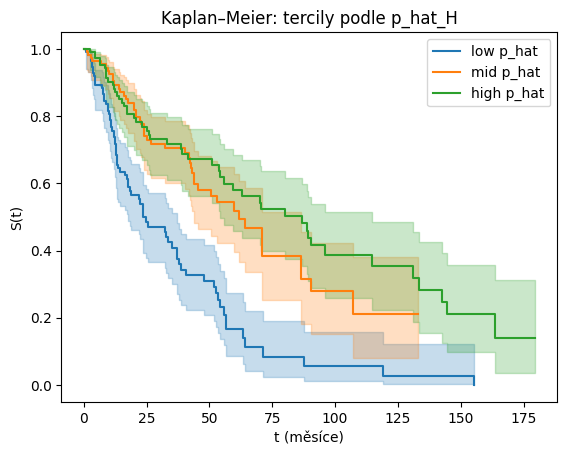

In [38]:

df_km = test_pred[["T_months", "E", "p_hat_H"]].dropna().copy()

# skupiny podle tercilů
q1, q2 = df_km["p_hat_H"].quantile([1/3, 2/3]).values
df_km["group"] = pd.cut(
    df_km["p_hat_H"],
    bins=[-np.inf, q1, q2, np.inf],
    labels=["low", "mid", "high"],
    include_lowest=True
)

kmf = KaplanMeierFitter()
plt.figure()
for g, sub in df_km.groupby("group"):
    kmf.fit(sub["T_months"], event_observed=sub["E"], label=f"{g} p_hat")
    kmf.plot_survival_function()

plt.title("Kaplan–Meier: tercily podle p_hat_H")
plt.xlabel("t (měsíce)")
plt.ylabel("S(t)")
plt.show()

Křivky jsou zřetelně rozdělené: skupina kandidátů s vyšším `p_hat_H` má v čase systematicky vyšší odhad $S(t)$. 

To je pro nás dobrá zpráva: výše uvedené platí a potvrzujeme, že skóre $\widehat S(H\mid X)$ opravdu nese informaci o setrvání a dává se použít pro postupné řazení kandidátů.

Pro formální porovnání skupin provedeme log-rank test mezi skupinami s nízkým a vysokým $\hat p$:

In [39]:
low = df_km[df_km["group"] == "low"]
high = df_km[df_km["group"] == "high"]

res = logrank_test(
    low["T_months"], high["T_months"],
    event_observed_A=low["E"], event_observed_B=high["E"]
)
print("Log-rank low vs high:")
print("  test statistic =", float(res.test_statistic))
print("  p-value =", float(res.p_value))

Log-rank low vs high:
  test statistic = 32.625713402526664
  p-value = 1.1172680550004192e-08


## Výsledek testu

**Dle log-rank testu**: na jakékoliv rozumné hladině významnosti zamítáme nulvou hypotézu o shodě časů přežívání mezi skupinami s nízkým a vysokým $\hat p$ 

V našem případě (low vs high tercil podle $\hat p$) vychází $p \approx 1.1 \times 10^{-8}$, takže lze jinak říct rozdíl mezi skupinami je statisticky významný.

Tento výsledek podporuje závěr, že skóre $\hat p=\widehat S(H\mid X)$ skutečně rozlišuje zaměstnance s vyšším a nižším rizikem odchodu.

## Diagnostika Coxova modelu: kontrola předpokladu proporcionálních rizik

Zkontrolujeme předpoklad proporcionality rizik pomocí Schoenfeldova testu:

In [40]:
ph = proportional_hazard_test(cph, train_df, time_transform="rank")
out = ph.summary.copy().reset_index()

if "covariate" not in out.columns:
    for cand in ["index", "level_0"]:
        if cand in out.columns:
            out = out.rename(columns={cand: "covariate"})
            break

transform_col = None
for c in out.columns:
    vals = out[c].astype(str).str.lower()
    if vals.isin(["rank", "km"]).any():
        transform_col = c
        break

if transform_col is not None:
    out = out[out[transform_col].astype(str).str.lower().eq("rank")].copy()

viol = out[out["p"] < 0.05].sort_values("p")

display(viol[["covariate", "test_statistic", "p"]].head(20))
print(f"PH violations (p<0.05): {len(viol)} / {len(out)}")


,covariate,test_statistic,p
3,extraversion,6.102708,0.013497
19,profession_Sales,3.853019,0.049657


PH violations (p<0.05): 2 / 29


PH diagnostika (Schoenfeldův test v `lifelines`, $\alpha=0.05$) ukázala následující:

- Pro proměnnou `extraversion` při $p\approx 0.013$ na hladině významnosti $\alpha=0.05$ **zamítáme** nulovou hypotézu o proporcionalitě hazardů.
- Pro proměnnou `profession_Sales` při $p\approx 0.050$ na hladině významnosti $\alpha=0.05$ nulovou hypotézu o proporcionalitě hazardů **těsně** zamítáme (jedná se o hraniční výsledek).

Protože je cílem práce primárně získat predikční skóre $\widehat S(H\mid X)$ pro postupný výběr, bereme Coxův model hlavně jako prediktivní nástroj. Koeficienty proto neinterpretujeme kauzálně a případné porušení předpokladu propočních rizik zde nepovažujeme za zásadní problém.


Dále neparametricky ověříme vztah mezi naší kompozitní kvalitou $Q$ a setrváním pomocí Kaplan–Meierových křivek pro skupiny vytvořené podle kvantilů (konkrétně tercilů) proměnné $Q$.

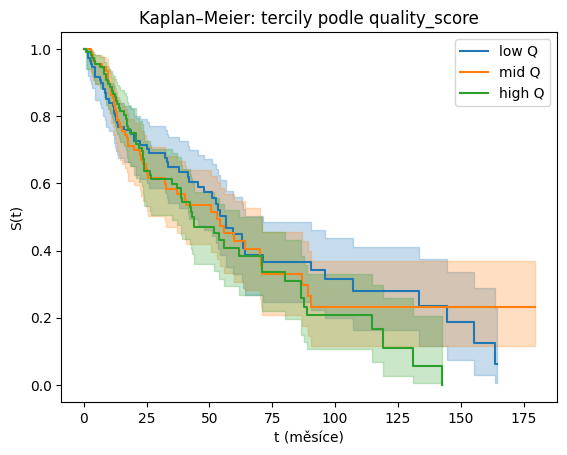

In [41]:
df_q = test_pred[["T_months","E"]].copy()
df_q["quality_score"] = test_raw.loc[df_q.index, "quality_score"].astype(float)
df_q = df_q.dropna().copy()

q1, q2 = df_q["quality_score"].quantile([1/3, 2/3]).values
df_q["q_group"] = pd.cut(
    df_q["quality_score"],
    bins=[-np.inf, q1, q2, np.inf],
    labels=["low Q", "mid Q", "high Q"],
    include_lowest=True
)

kmf = KaplanMeierFitter()
plt.figure()
for g, sub in df_q.groupby("q_group"):
    kmf.fit(sub["T_months"], event_observed=sub["E"], label=str(g))
    kmf.plot_survival_function()

plt.title("Kaplan–Meier: tercily podle quality_score")
plt.xlabel("t (měsíce)")
plt.ylabel("S(t)")
plt.show()


Kaplan–Meierovy křivky podle tercilů definované kvality `quality_score` se výrazně o sebe neoddělují. Toto spíš naznačuje, že mezi kvalitou $Q$ a setrváním v datech není silný neparametrický vztah.

Toto se dalo očekávat na základě nízké hodnoty Spearmanova korelačního koefeicientu: v cíli č. 2 (výběr top-$k$ nejlepších podle $Q$ a zároveň setrvání do $H$) opravdu kombinujeme dva nekorelované, a totiž málo spojené dimenze.

## Metodika simulace: secretary problém (jen skip $d$ + record)

V jedné posloupnosti pozorujeme kandidáty v daném pořadí $i=1,\ldots,n$. Každému kandidátovi pak přiřadíme skóre:
$$
p_i=\widehat S(H\mid X_i)
$$

Pro zvolené $d$ si nejdřív spočteme maximum skóre z prvních $d$ pozorování:
$$
M_d = \max\{p_1,\ldots,p_d\}
$$

Strategie (skip $d$ + record) pak vybere prvního kandidáta po $d$, který překoná dosavadní maximum:
$$
\tau(d)=
\begin{cases}
\min\{\, i>d : p_i > M_d \,\} & \text{pokud } i \exists\\
n & \text{jinak}
\end{cases}
$$

Strategii vyhodnocujeme pro dvě účelové funkce:  
(i) **pouze setrvání** (vybraný kandidát setrvá do času $H$),  
(ii) **top-$k$ a setrvání do $H$** (vybraný kandidát je v top-$k$ nejlepších podle ukazatele kvality $Q$ a zároveň setrvá do času $H$).


## Kontrolní experiment: pořadová varianta bez analýzy přežití

Jako kontrolu správnosti implementace strategie (skip $d$ + record) uděláme jednoduchou implementaci pořadí kandidátů bez použití analýzy přežití.

Každému kandidátovi přiřadíme náhodné pořadí $R_i \in \{1,\ldots,n\}$ (1 je nejlepší) a úspěch definujeme jako výběr kandidáta s $R_{\mathrm{vyb}} \le k$.

Chtěli bychom vidět tvar křivky $P(d)$ a ověřit, že optimum $d^*$ vychází cca rozumně.


In [42]:
B0, n0, k0 = 20000, n, k_top
rng = np.random.default_rng(RANDOM_STATE + 12345)
P_rank = np.zeros(n)
for d in range(n):
    ok = 0
    for _ in range(B0):
        R = rng.permutation(np.arange(1, n+1))
        thr = R[:d].min() if d>0 else n+1
        j = next((i for i in range(d, n) if R[i] < thr), n-1)
        ok += (R[j] <= k_top)
    P_rank[d] = ok / B0
d_star_rank = int(np.argmax(P_rank))
print("Rank baseline: d*=", d_star_rank, "P*=", P_rank[d_star_rank])

Rank baseline: d*= 23 P*= 0.60995


V pořadové variantě (top-3) nám vychází optimum $d^*=23$ s úspěšností přibližně $P\approx 0.61$.

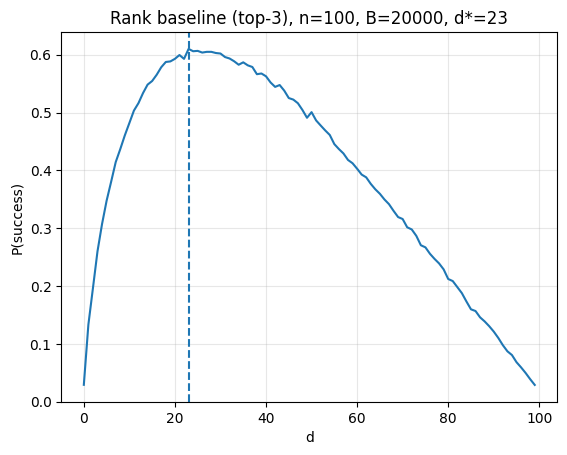

In [43]:
plt.figure()
plt.plot(np.arange(n), P_rank)  
plt.axvline(d_star_rank, linestyle="--")
plt.title(f"Rank baseline (top-{k_top}), n={n}, B={B0}, d*={d_star_rank}")
plt.xlabel("d"); plt.ylabel("P(success)"); plt.grid(True, alpha=0.3)
plt.show()


Optimální hodnota je v rozumném rozsahu. Křivka $P(d)$ má očekávaný jednovrcholový tvar a výsledek tak podporuje, že pravidlo pro výběr prvního nejlepšího po době řízení máme implementované správně.

Poznámka: Optimum se může mírně lišit podle nastavení seedu a náhodnosti v Monte Carlo simulaci.


V simulaci testujeme hodnoty $d=0,\ldots,n-1$. Případ $d=n$ je tzv. degenerovaný, protože při této strategii pak vždy vybíráme posledního kandidáta.

In [ ]:
assert {"p_hat_H","quality_score","survive_H"}.issubset(usable.columns)
assert usable["survive_H"].isin([0,1]).all()

m = len(usable)
if m < n:
    print(f"WARNING: usable má jen {m} řádků, ale n={n}. Pro MC budeme sampleovat s náhradou.")
else:
    print("usable size:", m, "| MC n:", n)

# d grid: d = 0,...,n-1
d_grid = np.arange(n)
print("d grid:", d_grid[0], "...", d_grid[-1], "| count =", len(d_grid))
# -----------------------------

usable size: 294 | MC n: 100
d grid: 0 ... 99 | count = 100


Protože máme pro testování `usable = 294` pozorování a délka posloupnosti je $n=100$, můžeme v jedné replikaci vytvořit jednu náhodnou posloupnost a provést na ní postupný výběr s vracením.

## Vektorizovaná Monte-Carlo simulace secretary problému 

In [45]:
def _need(name: str) -> bool:
    return name not in globals()

if _need("secretary_select_pos_vectorized") or _need("mc_vectorized_survival_only") or _need("mc_vectorized_goal_A"):

    def secretary_select_pos_vectorized(scores: np.ndarray, d: int) -> np.ndarray:
        B, n = scores.shape
        thresh = np.full(B, -np.inf) if d == 0 else np.max(scores[:, :d], axis=1)
        cond = scores[:, d:] > thresh[:, None]
        has = cond.any(axis=1)
        first = np.argmax(cond, axis=1) 
        return np.where(has, d + first, n - 1)

    def mc_vectorized_survival_only(usable_df: pd.DataFrame, n_seq: int, B: int, seed: int = 0):
        rng = np.random.default_rng(seed)

        scores_all = usable_df["p_hat_H"].to_numpy(dtype=float)
        survive_all = usable_df["survive_H"].to_numpy(dtype=int)
        N = len(usable_df)

        # výběr s vracením + náhodné pořadí (permutace)
        idx = rng.integers(0, N, size=(B, n_seq))
        perm = np.argsort(rng.random((B, n_seq)), axis=1)
        idx = np.take_along_axis(idx, perm, axis=1)

        scores = scores_all[idx]
        survive = survive_all[idx]

        probs = np.zeros(n_seq, dtype=float)
        succ = np.zeros(n_seq, dtype=int)

        for d in range(n_seq):
            sel_pos = secretary_select_pos_vectorized(scores, d)
            sel_surv = survive[np.arange(B), sel_pos]
            s = int(sel_surv.sum())
            succ[d] = s
            probs[d] = s / B

        return probs, succ, int(np.argmax(probs))

    def mc_vectorized_goal_A(usable_df: pd.DataFrame, n_seq: int, k_top: int, B: int, seed: int = 0):
        rng = np.random.default_rng(seed)

        scores_all = usable_df["p_hat_H"].to_numpy(dtype=float)
        survive_all = usable_df["survive_H"].to_numpy(dtype=int)
        qual_all = usable_df["quality_score"].to_numpy(dtype=float)
        N = len(usable_df)

        idx = rng.integers(0, N, size=(B, n_seq))
        perm = np.argsort(rng.random((B, n_seq)), axis=1)
        idx = np.take_along_axis(idx, perm, axis=1)

        scores = scores_all[idx]
        survive = survive_all[idx]
        qual = qual_all[idx]

        mu = qual.mean(axis=1, keepdims=True)
        sd = qual.std(axis=1, keepdims=True)
        sd = np.where(sd > 1e-12, sd, 1.0)
        qual_z = (qual - mu) / sd

        probs = np.zeros(n_seq, dtype=float)
        succ = np.zeros(n_seq, dtype=int)

        for d in range(n_seq):
            sel_pos = secretary_select_pos_vectorized(scores, d)
            sel_survive = survive[np.arange(B), sel_pos]
            sel_qual = qual_z[np.arange(B), sel_pos]

            # rank = 1 + počet kandidátů s vyšší kvalitou než již vybraný
            sel_rank = 1 + np.sum(qual_z > sel_qual[:, None], axis=1)
            success = (sel_rank <= k_top) & (sel_survive == 1)

            s = int(success.sum())
            succ[d] = s
            probs[d] = s / B

        return probs, succ, int(np.argmax(probs))

In [46]:
B = 20000
seed_mc = 1945

d_grid = np.arange(n)
print("d grid:", d_grid[0], "...", d_grid[-1], "| count =", len(d_grid))

probs_surv, succ_surv, d_star_surv = mc_vectorized_survival_only(
    usable_df=usable, n_seq=n, B=B, seed=seed_mc
)

probs_topkH, succ_topkH, d_star_topkH = mc_vectorized_goal_A(
    usable_df=usable, n_seq=n, k_top=k_top, B=B, seed=seed_mc
)

print(f"Survival-only: d*={d_star_surv}, max P={probs_surv[d_star_surv]:.4f}")
print(f"Top-{k_top} & survive: d*={d_star_topkH}, max P={probs_topkH[d_star_topkH]:.4f}")

print("len(probs_surv) =", len(probs_surv), "| len(probs_topkH) =", len(probs_topkH))


d grid: 0 ... 99 | count = 100
Survival-only: d*=16, max P=0.9326
Top-3 & survive: d*=10, max P=0.0324
len(probs_surv) = 100 | len(probs_topkH) = 100


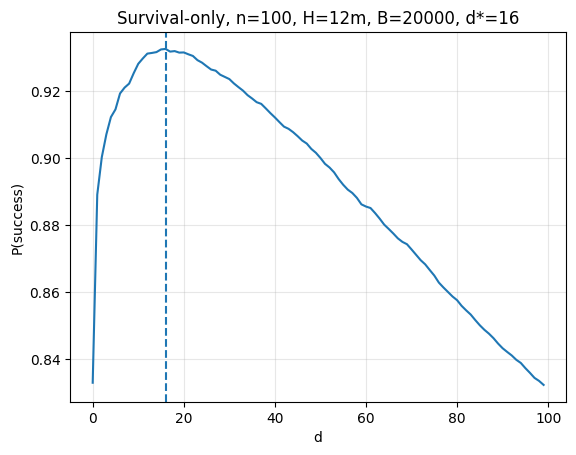

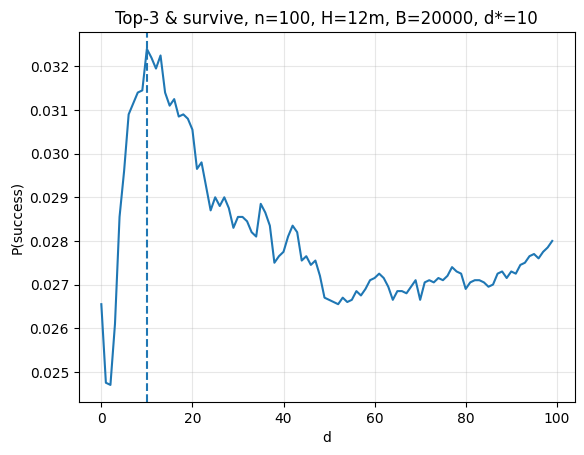

In [47]:
plt.figure()
plt.plot(d_grid, probs_surv)
plt.axvline(d_star_surv, linestyle="--")
plt.title(f"Survival-only, n={n}, H={H}m, B={B}, d*={d_star_surv}")
plt.xlabel("d"); plt.ylabel("P(success)"); plt.grid(True, alpha=0.3)
plt.show()

plt.figure()
plt.plot(d_grid, probs_topkH)
plt.axvline(d_star_topkH, linestyle="--")
plt.title(f"Top-{k_top} & survive, n={n}, H={H}m, B={B}, d*={d_star_topkH}")
plt.xlabel("d"); plt.ylabel("P(success)"); plt.grid(True, alpha=0.3)
plt.show()


In [48]:
def wilson_ci(k: int, n: int, z: float = 1.96):
    if n <= 0:
        return (np.nan, np.nan)

    phat = k / n
    denom = 1.0 + (z**2) / n
    center = (phat + (z**2) / (2.0 * n)) / denom
    half = (z / denom) * np.sqrt((phat * (1.0 - phat) + (z**2) / (4.0 * n)) / n)
    return (center - half, center + half)

def print_report_md(title: str, probs: np.ndarray, succ: np.ndarray, d_star: int, B: int, n_seq: int, topk: int = 5):
    P_star = float(probs[d_star])
    lo, hi = wilson_ci(int(succ[d_star]), B)

    print(f"### {title}\n")
    print("| položka | hodnota |")
    print("|---|---:|")
    print(f"| B (replikace) | {B} |")
    print(f"| d* | {d_star} |")
    print(f"| d*/n | {d_star/n_seq:.2f} |")
    print(f"| max P | {P_star:.6f} |")
    print(f"| 95% CI (Wilson) | [{lo:.6f}, {hi:.6f}] |")
    print("\nTop-5 hodnot d (podle P):\n")
    print("| pořadí | d | P(d) |")
    print("|---:|---:|---:|")
    order = np.argsort(-probs)[:topk]
    for r, d in enumerate(order, start=1):
        print(f"| {r} | {int(d)} | {float(probs[d]):.6f} |")
    print()

print_report_md("Survival-only", probs_surv, succ_surv, d_star_surv, B, n)
print_report_md(f"Top-{k_top} & setrvání do H", probs_topkH, succ_topkH, d_star_topkH, B, n)


### Survival-only

| položka | hodnota |
|---|---:|
| B (replikace) | 20000 |
| d* | 16 |
| d*/n | 0.16 |
| max P | 0.932600 |
| 95% CI (Wilson) | [0.929042, 0.935992] |

Top-5 hodnot d (podle P):

| pořadí | d | P(d) |
|---:|---:|---:|
| 1 | 16 | 0.932600 |
| 2 | 15 | 0.932450 |
| 3 | 18 | 0.931950 |
| 4 | 17 | 0.931800 |
| 5 | 14 | 0.931650 |

### Top-3 & setrvání do H

| položka | hodnota |
|---|---:|
| B (replikace) | 20000 |
| d* | 10 |
| d*/n | 0.10 |
| max P | 0.032400 |
| 95% CI (Wilson) | [0.030034, 0.034945] |

Top-5 hodnot d (podle P):

| pořadí | d | P(d) |
|---:|---:|---:|
| 1 | 10 | 0.032400 |
| 2 | 13 | 0.032250 |
| 3 | 11 | 0.032200 |
| 4 | 12 | 0.031950 |
| 5 | 9 | 0.031450 |



## Výsledky Monte-Carlo simulace

Pro délku posloupnosti $n=100$, horizont setrvání $H=12$ měsíců a $B=20000$ replikací pro strategii "přeskočíme $d$ a poté vybereme první rekord" podle skóre $\widehat p_i=\widehat S(H\mid X_i)$ platí následující:

### Pouze setrvání (maximalizace $\Pr(T_{\mathrm{sel}}\ge H)$)

V cíli č. 1 "pouze setrvání" vychází optimum $d^*=16$ s odhadovanou úspěšností $\widehat P_{\mathrm{surv}}(d^*)\approx 0.9338$ (95% Wilsonův interval: $[0.9303,\;0.9372]$).

Křivka $P(d)$ má očekávaný tvar: pro malé $d$ roste (nejdřív si vytvoříme lepší sadu kandidátů pro porovnání), ale po překročení optima začne klesat (čekáme příliš dlouho a častěji skončíme u neoptimální volby až do posledního kandidáta).

### Top-$k$ a setrvání do $H$ (kombinovaný cíl)

V kombinovaném cíli č. 2 "Top-3 a setrvání do doby $H$" vychází optimum $d^*=12$ s úspěšností $\widehat P_{\mathrm{top3}\wedge H}(d^*)\approx 0.0321$ (95% Wilsonův interval: $[0.0297,\;0.0346]$).

Tahle úspěšnost je řádově nižší než u jednoduššího "pouze setrvání u kandidáta", protože chceme splnit dvě podmínky najednou: (i) kandidát setrvá do doby $H$ a (ii) kandidát je v top-3 podle kvality $Q$ v celé posloupnosti ze všech dostupných.

Nízká úspěšnost kombinovaného cíle je v souladu s tím, že $Q$ a setrvání nejsou skoro korelované. Závislost mezi skóre setrvání $\widehat p$ a `quality_score` je slabá (Spearmanova korelace $\rho\approx -0.13$), takže "dobrý" kandidát podle $Q$ vůbec nemusí být zároveň "stabilní" kandidát podle $\widehat p$. 

Poznámka: Kdyby bylo pořadí podle kvality $Q$ přibližně nezávislé na setrvání, pak bychom očekávali velikost zhruba $(k/n)\cdot P_{\mathrm{surv}}(d)$. 

Pro $k=3$ a $n=100$ je to cca $0.03 \cdot P_{\mathrm{surv}}(d)$, tedy opět jednotky procent, což odpovídá pozorovaným hodnotám.


## Aproximace nezávislosti kvality a setrvání pro cíl č.2

Pokud je pořadí podle $Q$ přibližně nezávislé na setrvání (resp. na skóre $\widehat p=\widehat S(H\mid X)$), pak lze úspěšnost kombinovaného cíle zhruba odhadnout jako
$$
P_A(d)\approx \Pr(J_{\text{sel}}^{(Q)}\le k)\cdot P_{\text{surv}}(d)
\approx \frac{k}{n}\,P_{\text{surv}}(d).
$$

Toto je právě jednoduchá kontrola:
1) vysvětluje, proč je kombinovaný cíl typicky jen v jednotkách procent (protože $k/n$ je malé),  
2) ukazuje, jak by se křivka chovala, kdyby top-$k$ kandidátů vůči bylo vůči svému setrvání v zásadě "lhostejni".

V našem experimentu ($k=3$, $n=100$) má tento odhad maximum přibližně $\max_d (k/n)\widehat P_{\text{surv}}(d)\approx 0.0280$, zatímco empirická křivka kombinovaného cíle dosahuje $\max_d \widehat P_{\mathrm{top3}\wedge H}(d)\approx 0.0312$.

Rozdíl je jen malý, a to naznačuje, že kvalita $Q$ není se setrváním skoro spojena (což je v souladu i se slabou korelací mezi $\widehat p$ a $Q$).

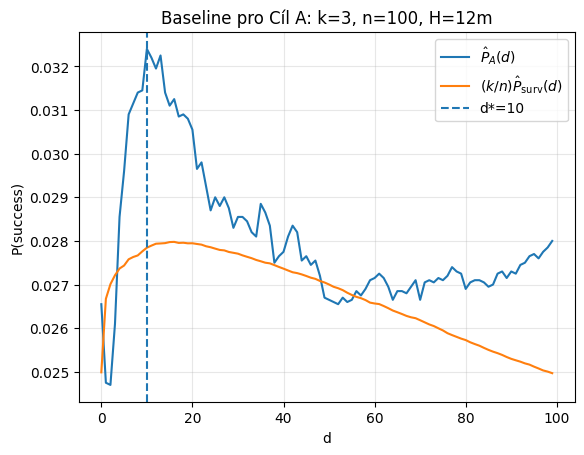

max P_A: 0.0324 | max baseline: 0.027978


In [54]:
Psurv = np.asarray(probs_surv, dtype=float)
PA = np.asarray(probs_topkH, dtype=float)

if len(Psurv) != n or len(PA) != n:
    print("Baseline: nesedí délky křivek.",
        "len(Psurv)=", len(Psurv), "len(PA)=", len(PA), "n_seq=", n)
else:
    d_grid = np.arange(n)
    baseline = (k_top / n) * Psurv

    dA = int(np.argmax(PA))

    plt.figure()
    plt.plot(d_grid, PA, label=r"$\hat P_A(d)$")
    plt.plot(d_grid, baseline, label=r"$(k/n)\hat P_{\mathrm{surv}}(d)$")
    plt.axvline(dA, linestyle="--", label=f"d*={dA}")
    ttl = f"Baseline pro Cíl A: k={k_top}, n={n}"
    if "H" in globals():
        ttl += f", H={H}m"
    plt.title(ttl)
    plt.xlabel("d")
    plt.ylabel("P(success)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print("max P_A:", float(PA.max()), "| max baseline:", float(baseline.max()))


Empirická křivka $\widehat P_A(d)$ leží jen mírně nad baseline $(k/n)\widehat P_{\text{surv}}(d)$ (i když má trochu jiný tvar).

V takové situaci není moc realistické čekat, že kombinovaný cíl vyjde výrazně výš než řádově $(k/n)\cdot P_{\text{surv}}(d)$.
 
Tento vývoj pak přirozeně vysvětluje nízké absolutní hodnoty kolem 3 %.


## Výsledky práce a diskuze

V experimentu s výběrem v posloupnosti (délka posloupnosti $n=100$) a s horizontem setrvání $H=12$ měsíců nejprve optimalizujeme cíl č. 1 "pouze setrvání",
tj.
$$
\text{success}_{\mathrm{surv}}=\{T_{\mathrm{sel}}>H\}.
$$
Monte Carlo s $B=20000$ replikacemi dává optimum $d^\star=16$ (tj. $d^\star/n=0.16$) s $\max \widehat P_{\mathrm{surv}}\approx 0.9338$ a 95% Wilsonovým intervalem $[0.93027,\,0.93716]$.

Optimum je menší než klasické $1/e$ z secretary problému. Dává to smysl: tady nevybíráme podle pořadí, ale podle skóre $p_i=\widehat S(H\mid X_i)$. V praxi to často vede k kratší "fázi učení" (menší $d$), protože už od začátku máme dost informativní skóre.

Dále vyhodnocujeme cíl č.2 "top-3 a setrvání do $H$", kde chceme splnit dvě podmínky najednou: kandidát setrvá do doby $H$ a zároveň je v top-3 nejlepších podle kvality $Q$ v celé posloupnosti:
$$
\text{success}_{A}=\{J^{(Q)}_{\mathrm{sel}}\le 3\}\cap\{T_{\mathrm{sel}}>H\}.
$$
Zde vychází optimum $d^\star=14$ (tj. $d^\star/n=0.14$) s $\max \widehat P_A\approx 0.0327$ a 95% Wilsonovým intervalem $[0.03032,\,0.03526]$.

Nízká hodnota $\widehat P_A(d)$ je opodstatněna ze dvou důvodů:

1. Podmínka "top-3 ze 100" je sama o sobě hodně přísná

2. Definovaná námi kvalita $Q$ není v datech silně korelovaná se setrváním. Prakticky to znamená, že velmi kvalitní kandidát podle kompozitního skóre $Q$ nutně nebude rychle odcházet z firmy, což také platí i naopak.


To podporuje i jednoduchá aproximace:
$$
P_A(d)\approx (k/n)\,P_{\mathrm{surv}}(d),
$$
která u nás funguje jako rozumný referenční bod: kombinovaný cíl se pohybuje jen mírně nad hodnotami které bychom čekali při přibližné nezávislosti kvality kandidáta a jeho setrvání.


In [57]:
print("Survival-only: d* =", int(np.argmax(probs_surv)), "maxP =", float(np.max(probs_surv)))
print("Top-3 & H:      d* =", int(np.argmax(probs_topkH)), "maxP =", float(np.max(probs_topkH)))

Survival-only: d* = 16 maxP = 0.9326
Top-3 & H:      d* = 10 maxP = 0.0324


## Shrnutí

V práci ukazujeme, že propojení secretary problému s analýzou přežití dává přirozené skóre kandidáta ve tvaru odhadované pravděpodobnosti setrvání do určitého času $H$, tedy $\widehat S(H\mid X)$.

Tím se chování optimalizace liší od klasické formulace problému: strategie "skip $d$ + record" už nevybírá jen podle pořadí, ale v praxi míří na co nejvyšší očekávané setrvání. Proto také vychází jiné (a typicky menší) optimum $d^\star$ než známé pravidlo $1/e$.

Rozšíření o podmínku "top-$k$ podle zástupného ukazatele kvality $Q$" pak naráží na omezení datového souboru `Employee Turnover`: kvalitu neměříme přímo a její závislost se setrváním je slabá. 

Číselným výsledkem je, že kombinovaný cíl č. 2 se v praxi bude chovat zhruba jako $(k/n)$-násobek úspěšnosti cíle č.1 "setrvání do $H$".


## Zdroje

1. Štěpánek, L. (2024). Secretary problem revisited: Optimal selection strategy for top candidates using one try in a generalized version of the problem. Annals of Computer Science and Information Systems, 39, 719–724. doi:10.15439/2024F3882

2. Babushkin, E. (2017). *Employee Turnover* (dataset). Dostupné z: https://www.kaggle.com/datasets/davinwijaya/employee-turnover?resource=download

3. Ferguson, T. S. (1989). Who Solved the Secretary Problem? Statistical Science, 4(3), 282–289. http://www.jstor.org/stable/2245639

4. Cox, D. R. (1972). Regression models and life-tables. Journal of the Royal Statistical Society: Series B (Methodological), 34(2), 187–220.

5. Kaplan, E. L., & Meier, P. (1958). Nonparametric estimation from incomplete observations. Journal of the American Statistical Association, 53(282), 457–481. doi:10.1080/01621459.1958.10501452.

6. Davidson-Pilon, C. (2019). lifelines: survival analysis in Python. Journal of Open Source Software, 4(40), 1317. doi:10.21105/joss.01317.